In [1]:
import jax.numpy as np
import matplotlib.pyplot as plt

from xpinn import XPINN
from utils import data_path, model_path, fig_path
import plotutils
from model_predict import NSpredict


In [2]:
activation = np.tanh

InnerBoxDecomp_file_test = data_path / "NavierStokes" / "test_InnerBoxDecomp.json" # change to test_InnerBox.json f
NoDecomp_file_test = data_path / "NavierStokes" / "test_NoDecomp.json"
TwoBoxDecomp_file_test = data_path / "NavierStokes" / "test_TwoBoxDecomp.json"

xpinnTwoBox = XPINN(TwoBoxDecomp_file_test, activation)
single_pinn = XPINN(NoDecomp_file_test, activation)
xpinnInnerBox = XPINN(InnerBoxDecomp_file_test, activation)


## Model paths

No decomp models

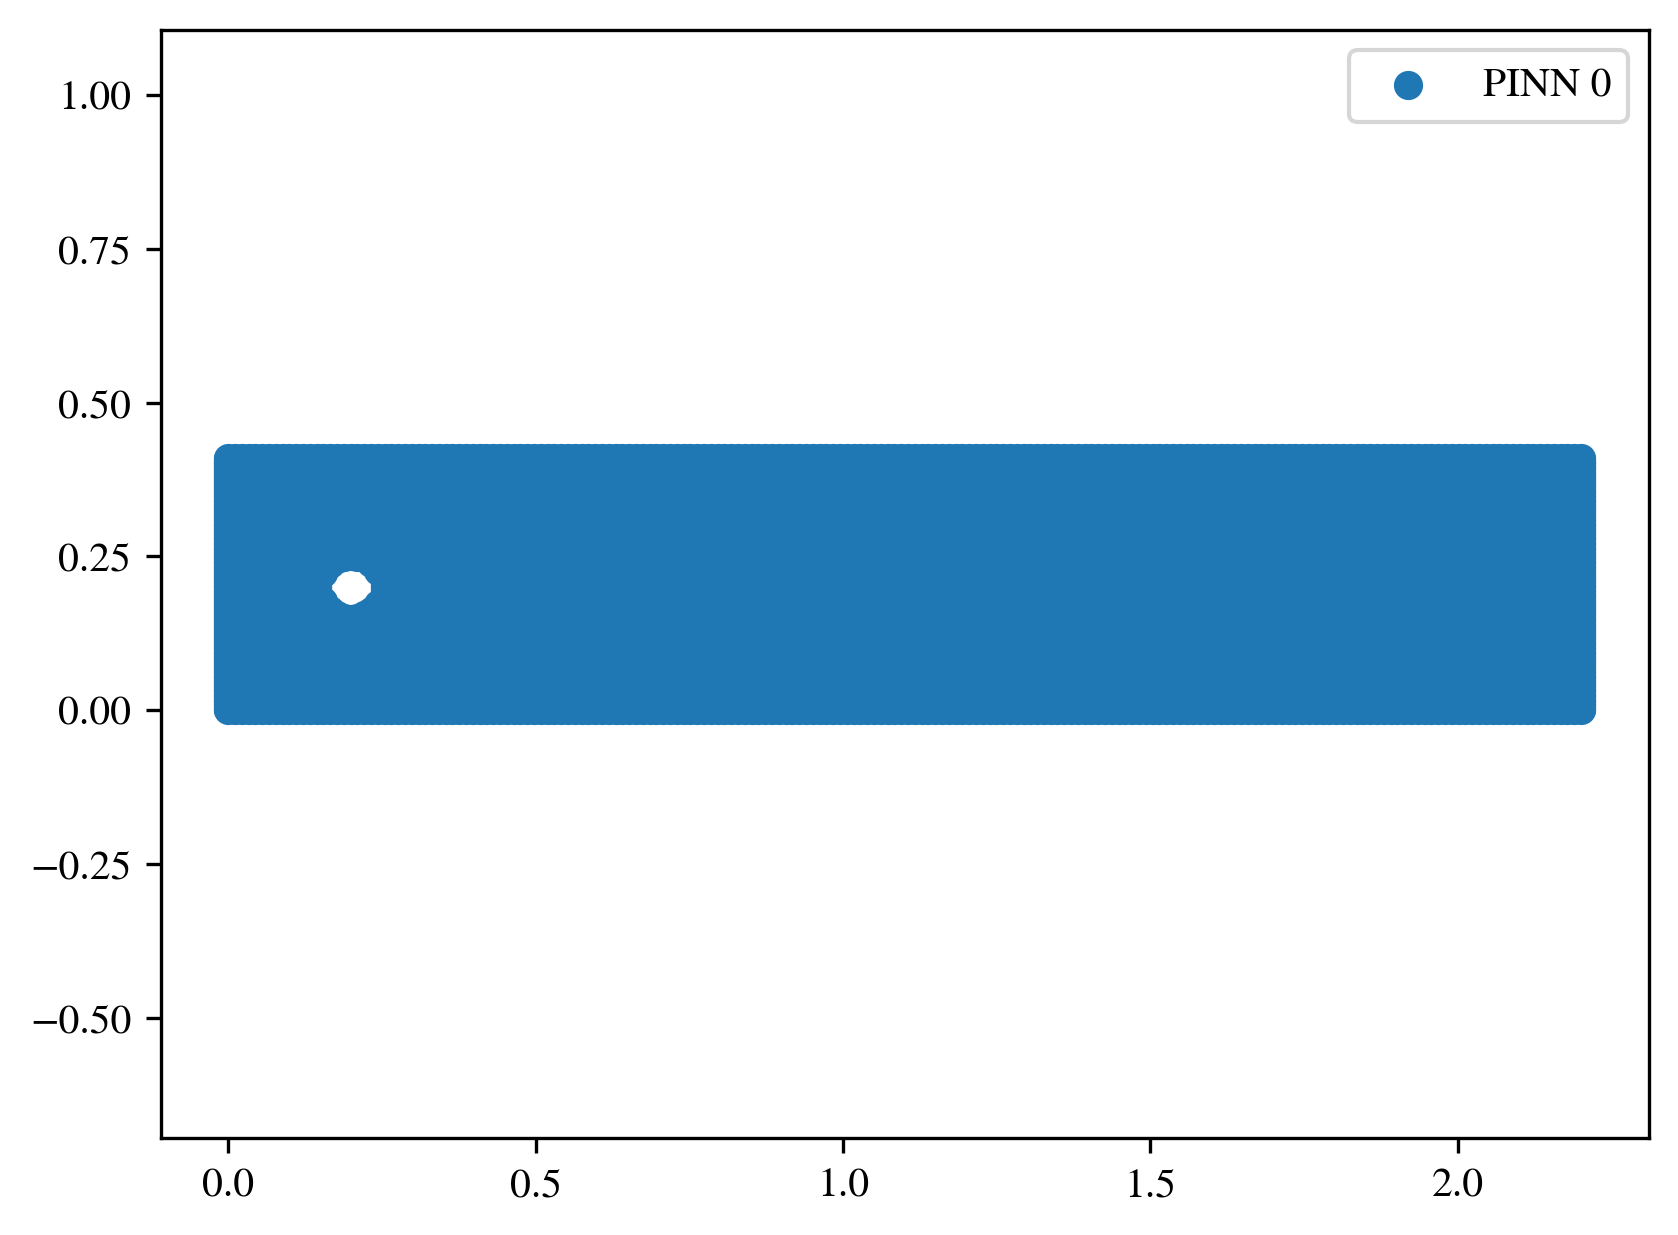

In [3]:
%matplotlib inline

plt.axis("equal"
)

for i, pinn in enumerate(single_pinn.PINNs):
    checkout = pinn.interior
    plt.scatter(checkout[:, 0], checkout[:, 1], label=f"PINN {i}")

plt.legend()


In [4]:
no_decomp_path = model_path / "NavierStokes" / "NoDecomp" / "laminar"

#models\NavierStokes\NoDecomp\laminar\ADAM_20000_iter_9layer\model0
ND_adam_20000_iter_9layer = no_decomp_path / "ADAM_20000_iter_9layer" / "model0"

#models/NavierStokes/NoDecomp/laminar/Pretrained_ADAM_20000_iter_8layer
ND_adam_pretrained_20000_iter_8layer = no_decomp_path / "Pretrained_ADAM_20000_iter_8layer"/ "model1" 

#models\NavierStokes\NoDecomp\laminar\NoCylinder\ADAM_20000_iter_8layer
ND_adam_no_cylinder_20000_iter_8layer = no_decomp_path / "NoCylinder" / "ADAM_20000_iter_8layer"

#models\NavierStokes\single_pinn\laminar\Adam_20000_iter_7layer_model0
ND_adam_20000_iter_good_model = model_path / "NavierStokes" / "single_pinn" / "laminar" / "Adam_20000_iter_7layer_model0"

### Decomp models

#### Inner box decomp

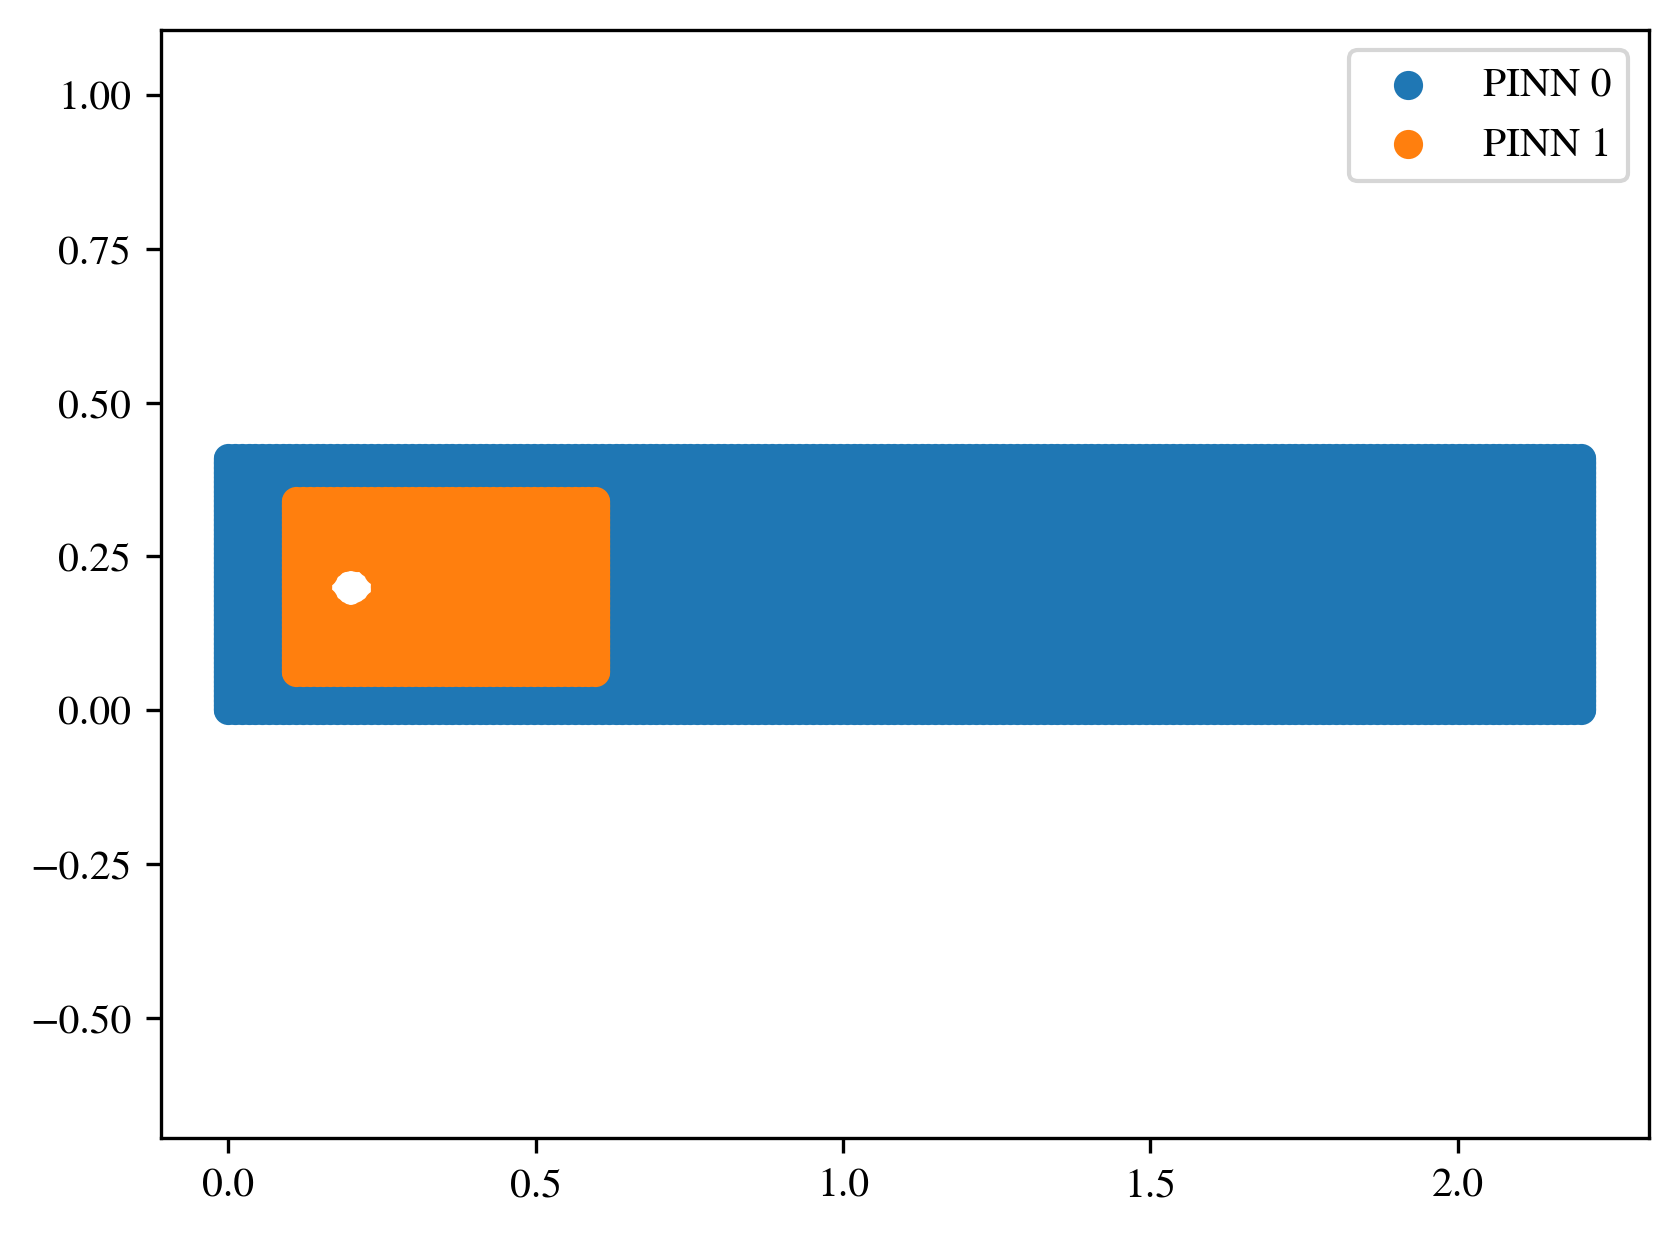

In [5]:
%matplotlib inline

plt.axis("equal"
)

for i, pinn in enumerate(xpinnInnerBox.PINNs):
    checkout = pinn.interior
    plt.scatter(checkout[:, 0], checkout[:, 1], label=f"PINN {i}")

plt.legend()

    

Inner box decomp paths

In [6]:
decomp_path = model_path / "NavierStokes" / "Decomp" / "laminar"

#models\NavierStokes\Decomp\laminar\ADAM_20000_iter_7layer
D_adam_20000_iter_7layer = decomp_path / "ADAM_20000_iter_7layer"

#models\NavierStokes\Decomp\laminar\NoCylinder\ADAM_20000_iter_8layer
D_adam_no_cylinder_20000_iter_8layer = decomp_path / "NoCylinder" / "ADAM_20000_iter_8layer" #this model is named wrong. its 7layer


#### Two box decomp 

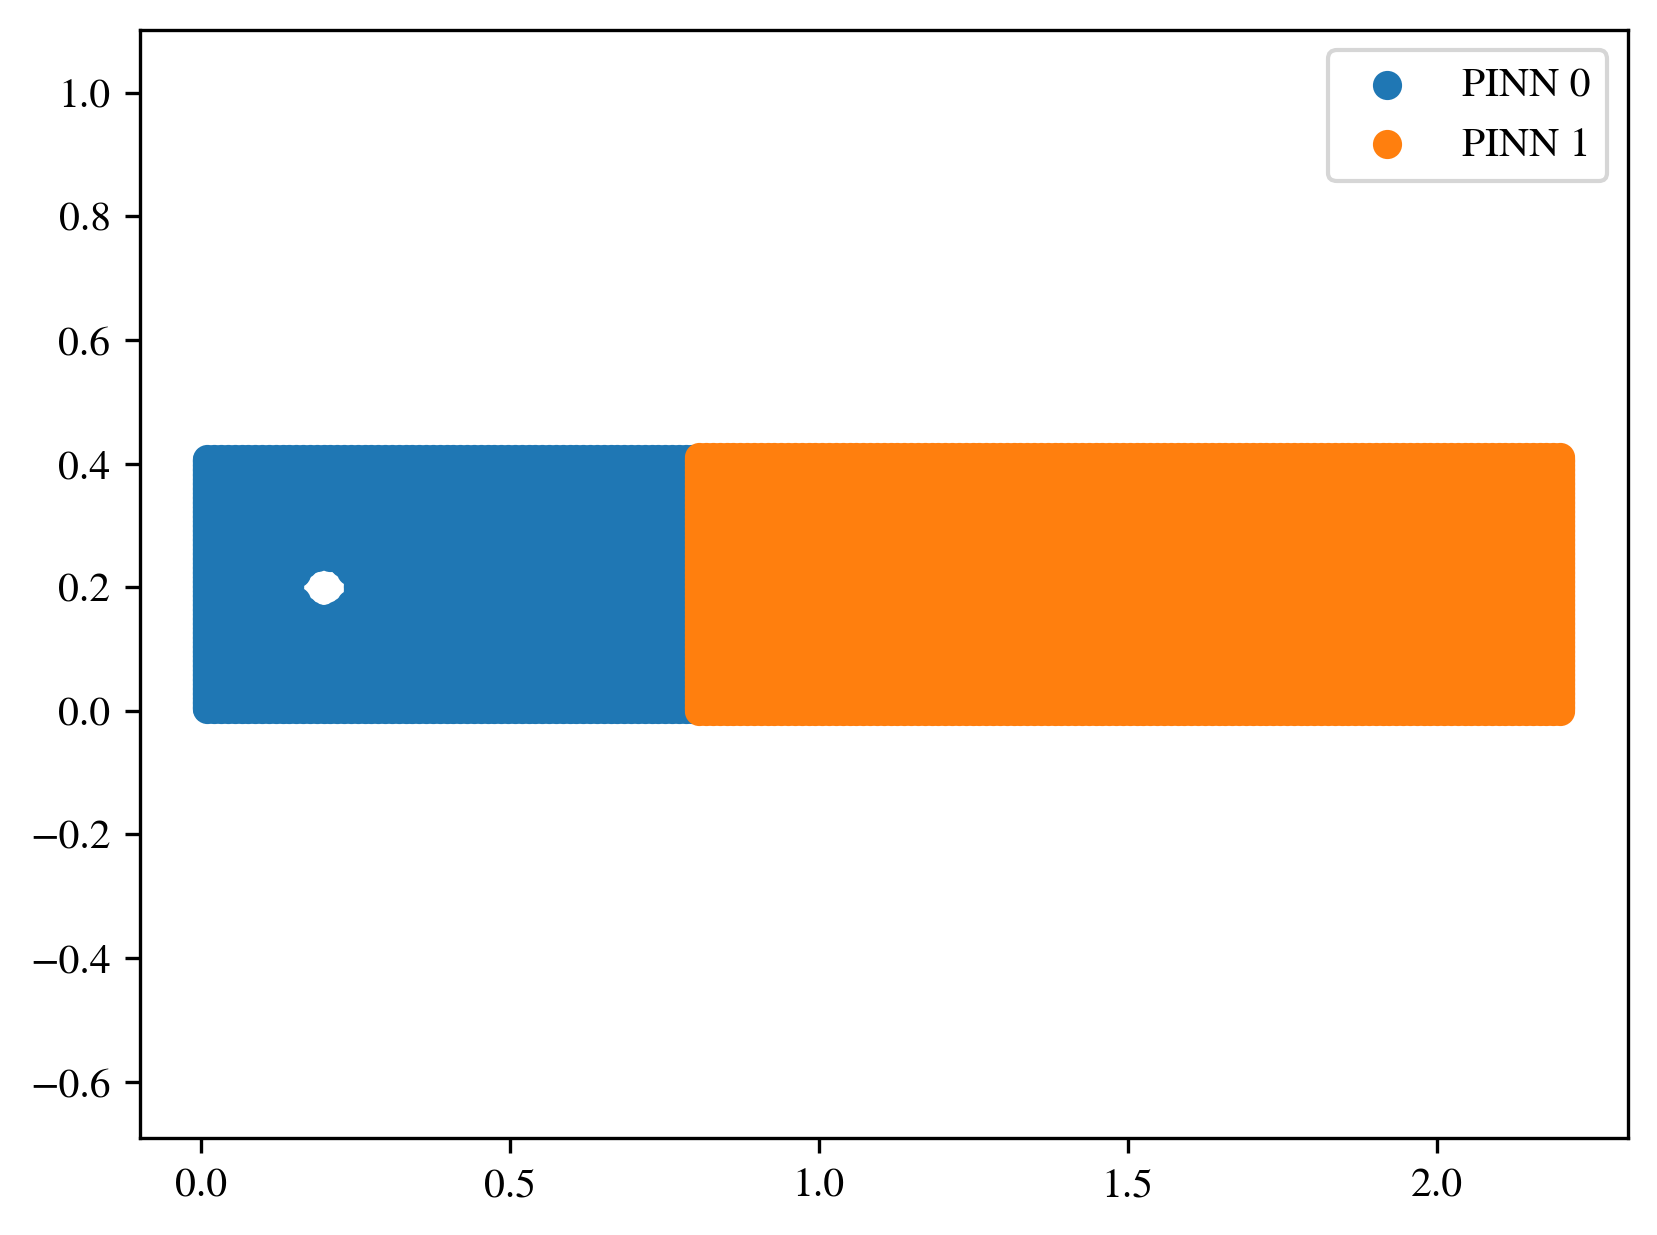

In [7]:
%matplotlib inline

plt.axis("equal"
)

for i, pinn in enumerate(xpinnTwoBox.PINNs):
    checkout = pinn.interior
    plt.scatter(checkout[:, 0], checkout[:, 1], label=f"PINN {i}")

plt.legend()

Two box model paths

In [8]:
two_box_model_path = model_path / "NavierStokes" / "Decomp_2"

#models\NavierStokes\Decomp_2\laminar_decomp_train_400_2100_v2_1.0_1.0_1.0_iterations=4000
TB_4000_iter = two_box_model_path / "laminar_decomp_train_400_2100_v2_1.0_1.0_1.0_iterations=4000"

#models\NavierStokes\Decomp_2\laminar_decomp_train_400_2100_v2_1.0_1.0_1.0_iterations=10000
TB_10000_iter = two_box_model_path / "laminar_decomp_train_400_2100_v2_1.0_1.0_1.0_iterations=10000"

#models\NavierStokes\Decomp_2\laminar_decomp_train_400_2100_v2_20.0_1.0_1.0_iterations=10000
TB_10000_iter_20_inflow_weight = two_box_model_path / "laminar_decomp_train_400_2100_v2_20.0_1.0_1.0_iterations=10000"

#models\NavierStokes\Decomp_2\laminar_decomp_train_400_2100_v2_20.0_20.0_1.0_iterations=10000
TB_10000_iter_20_inflow_wall_weight = two_box_model_path / "laminar_decomp_train_400_2100_v2_20.0_20.0_1.0_iterations=10000"

#models\NavierStokes\Decomp_2\laminar_decomp_train_400_2100_v2_20.0_40.0_1.0_iterations=10000
TB_10000_iter_20_inflow_wall_weight_40 = two_box_model_path / "laminar_decomp_train_400_2100_v2_20.0_40.0_1.0_iterations=10000"

#models\NavierStokes\Decomp_2\laminar_decomp_train_400_2100_v2_20.0_80.0_1.0_iterations=10000
TB_10000_iter_20_inflow_wall_weight_80 = two_box_model_path / "laminar_decomp_train_400_2100_v2_20.0_80.0_1.0_iterations=10000"

#models\NavierStokes\Decomp_2\laminar_decomp_train_400_2100_v2_40.0_20.0_1.0_iterations=10000
TB_10000_iter_40_inflow_wall_weight_20 = two_box_model_path / "laminar_decomp_train_400_2100_v2_40.0_20.0_1.0_iterations=10000"


#models\NavierStokes\Decomp_2\laminar_decomp_train_500_5000_v2_1.0_1.0_1.0_iterations=10000
TB_10000_iter_500_5000 = two_box_model_path / "laminar_decomp_train_500_5000_v2_1.0_1.0_1.0_iterations=10000"

#models\NavierStokes\Decomp_2\laminar_decomp_train_500_5000_v2_20.0_40.0_1.0_iterations=10000
TB_10000_iter_500_5000_20_40 = two_box_model_path / "laminar_decomp_train_500_5000_v2_20.0_40.0_1.0_iterations=10000"


#models\NavierStokes\Decomp_2\laminar_decomp_train_500_5000_v2_20.0_20.0_1.0_iterations=10000
TB_10000_iter_500_5000_20_20 = two_box_model_path / "laminar_decomp_train_500_5000_v2_20.0_20.0_1.0_iterations=10000"



#### Load prefered models

In [9]:

#Change these and run cells if you want to load a different model
single_pinn_model = ND_adam_20000_iter_9layer
InnerBox_model = D_adam_20000_iter_7layer
#TwoBox_model = TB_10000_iter_500_5000_20_20
#TwoBox_model = TB_10000_iter_500_5000_20_40
#TwoBox_model = TB_10000_iter_500_5000
#TwoBox_model = TB_10000_iter_20_inflow_wall_weight_80
TwoBox_model = TB_10000_iter_20_inflow_wall_weight_40


single_pinn_model_str = "ND_adam_20000_iter_9layer"
InnerBox_model_str = "D_adam_20000_iter_7layer"
#TwoBox_model_str = "TB_10000_iter_500_5000_20_20"
#TwoBox_model_str = "TB_10000_iter_500_5000_20_40"
#TwoBox_model_str = "TB_10000_iter_500_5000"
TwoBox_model_str = "TB_10000_iter_20_inflow_wall_weight_40"





In [10]:

single_pinn.load_model(single_pinn_model)


xpinnInnerBox.load_model(InnerBox_model)


xpinnTwoBox.load_model(TwoBox_model)

#### Losses

In [11]:
save_path_NoDecomp = fig_path / "NavierStokes" / "NoDecomp"/ f"{single_pinn_model_str}" / "losses"
save_path_IBDecomp = fig_path / "NavierStokes" / "InnnerBoxDecomp"/ f"{InnerBox_model_str}" / "losses"
save_path_TBDecomp = fig_path / "NavierStokes" / "TwoBoxDecomp"/ f"{TwoBox_model_str}" / "losses"



# XPINNtitle = "XPINN solution"
# PINNtitle = "PINN solution"

PINNlossTitle = "PINN losses over 20 000 iterations"
InnerBoxlossTitle = "XPINN losses over 6000 iterations"
TwoBoxlossTitle = "XPINN losses over 10 000 iterations"


save_path_NoDecomp.mkdir(parents=True, exist_ok=True)
save_path_IBDecomp.mkdir(parents=True, exist_ok=True)
save_path_TBDecomp.mkdir(parents=True, exist_ok=True)

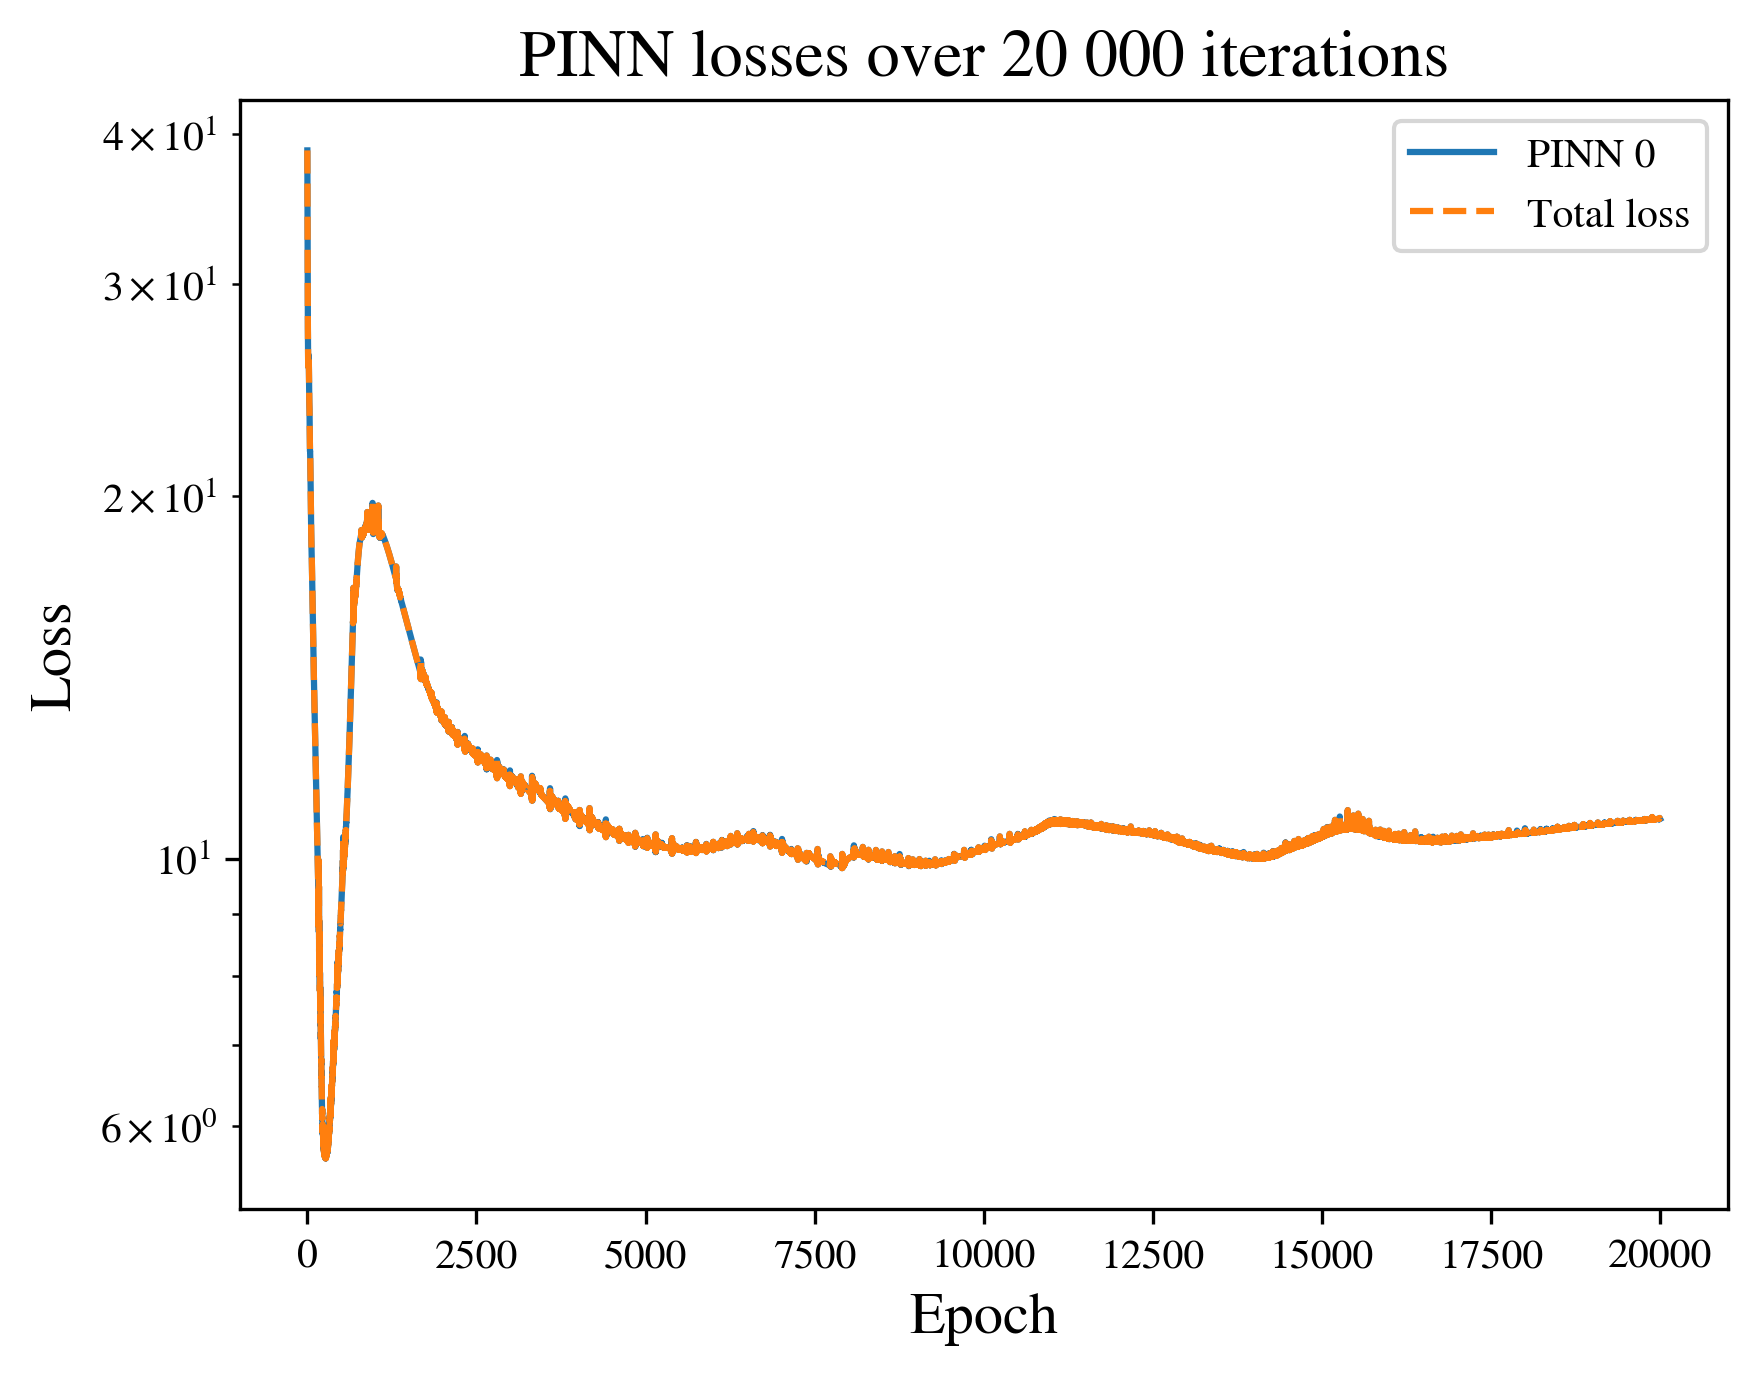

In [12]:
plotutils.plot_losses(
    a_losses=single_pinn.losses,
    n_iter=20000,
    title=PINNlossTitle,
    savepath=save_path_NoDecomp,
    save_name=f"PINN_losses",
)

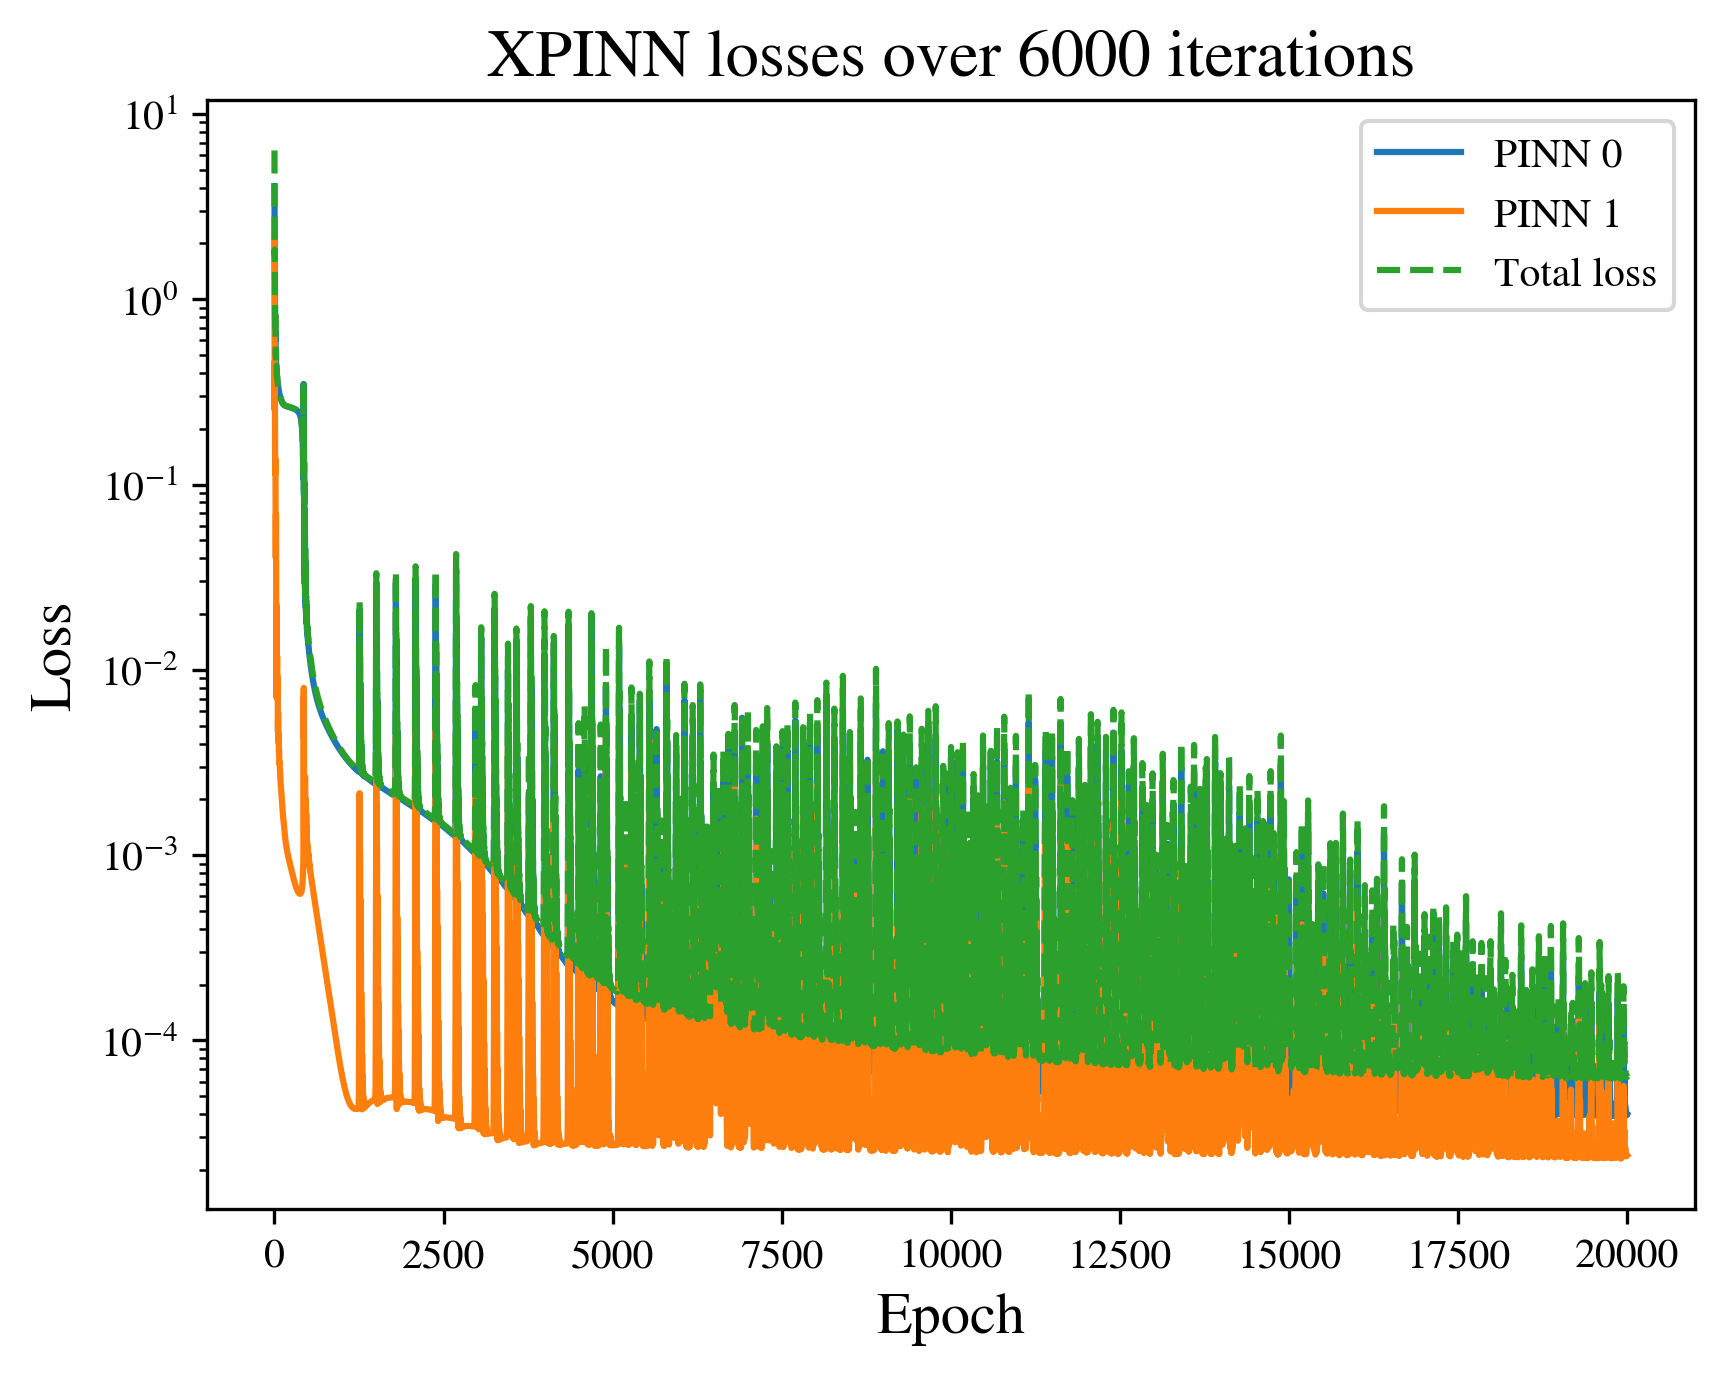

In [13]:
# plotutils.plot_losses(
#     a_losses=xpinnInnerBox.losses,
#     n_iter= 20000,
#     title= InnerBoxlossTitle,
#     savepath=save_path_IBDecomp,
#     save_name=f"XPINN_InnerBox_losses",
# )

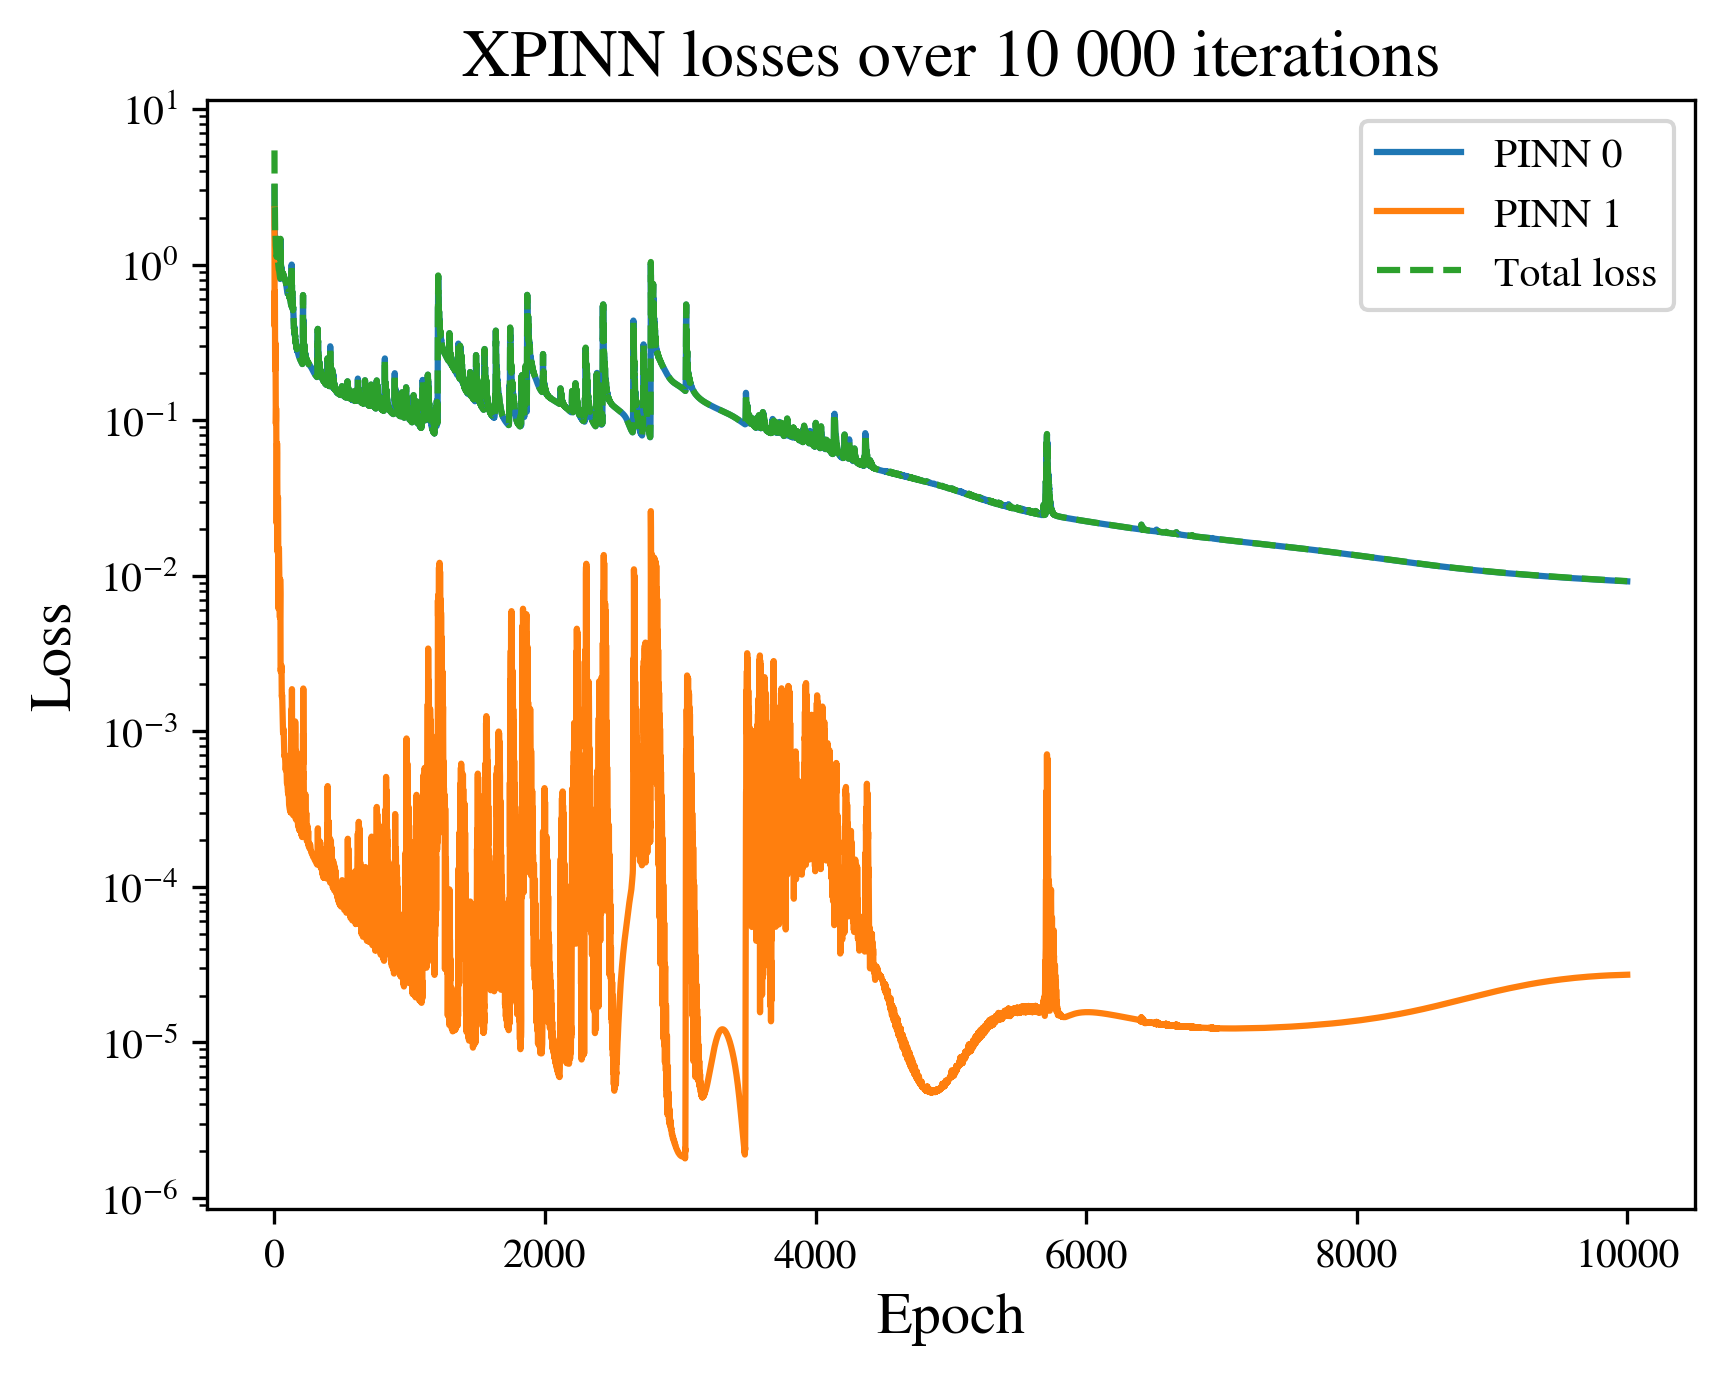

In [14]:
plotutils.plot_losses(
    a_losses=xpinnTwoBox.losses,
    n_iter=10000,
    title=TwoBoxlossTitle,
    savepath=save_path_TBDecomp,
    save_name=f"TwoBox_decomp_losses",
)

### Navier Stokes results

Savepaths and names for single pinn navier stokes results

In [15]:
No_decomp_solution_save_path = fig_path / "NavierStokes" / "NoDecomp" / f"{single_pinn_model_str}" / "solution"


#create_path
No_decomp_solution_save_path.mkdir(parents=True, exist_ok=True)

In [16]:
points, flow, flow_magitude, pressure, streamfunction = NSpredict(single_pinn, NoDecomp_file_test)

In [17]:
"""
def plot_navier_stokes(
    points: Array,
    val: Array,
    title: str,
    savepath: Path,
    save_name: str,
    clim: tuple = None,
):
"""

'\ndef plot_navier_stokes(\n    points: Array,\n    val: Array,\n    title: str,\n    savepath: Path,\n    save_name: str,\n    clim: tuple = None,\n):\n'

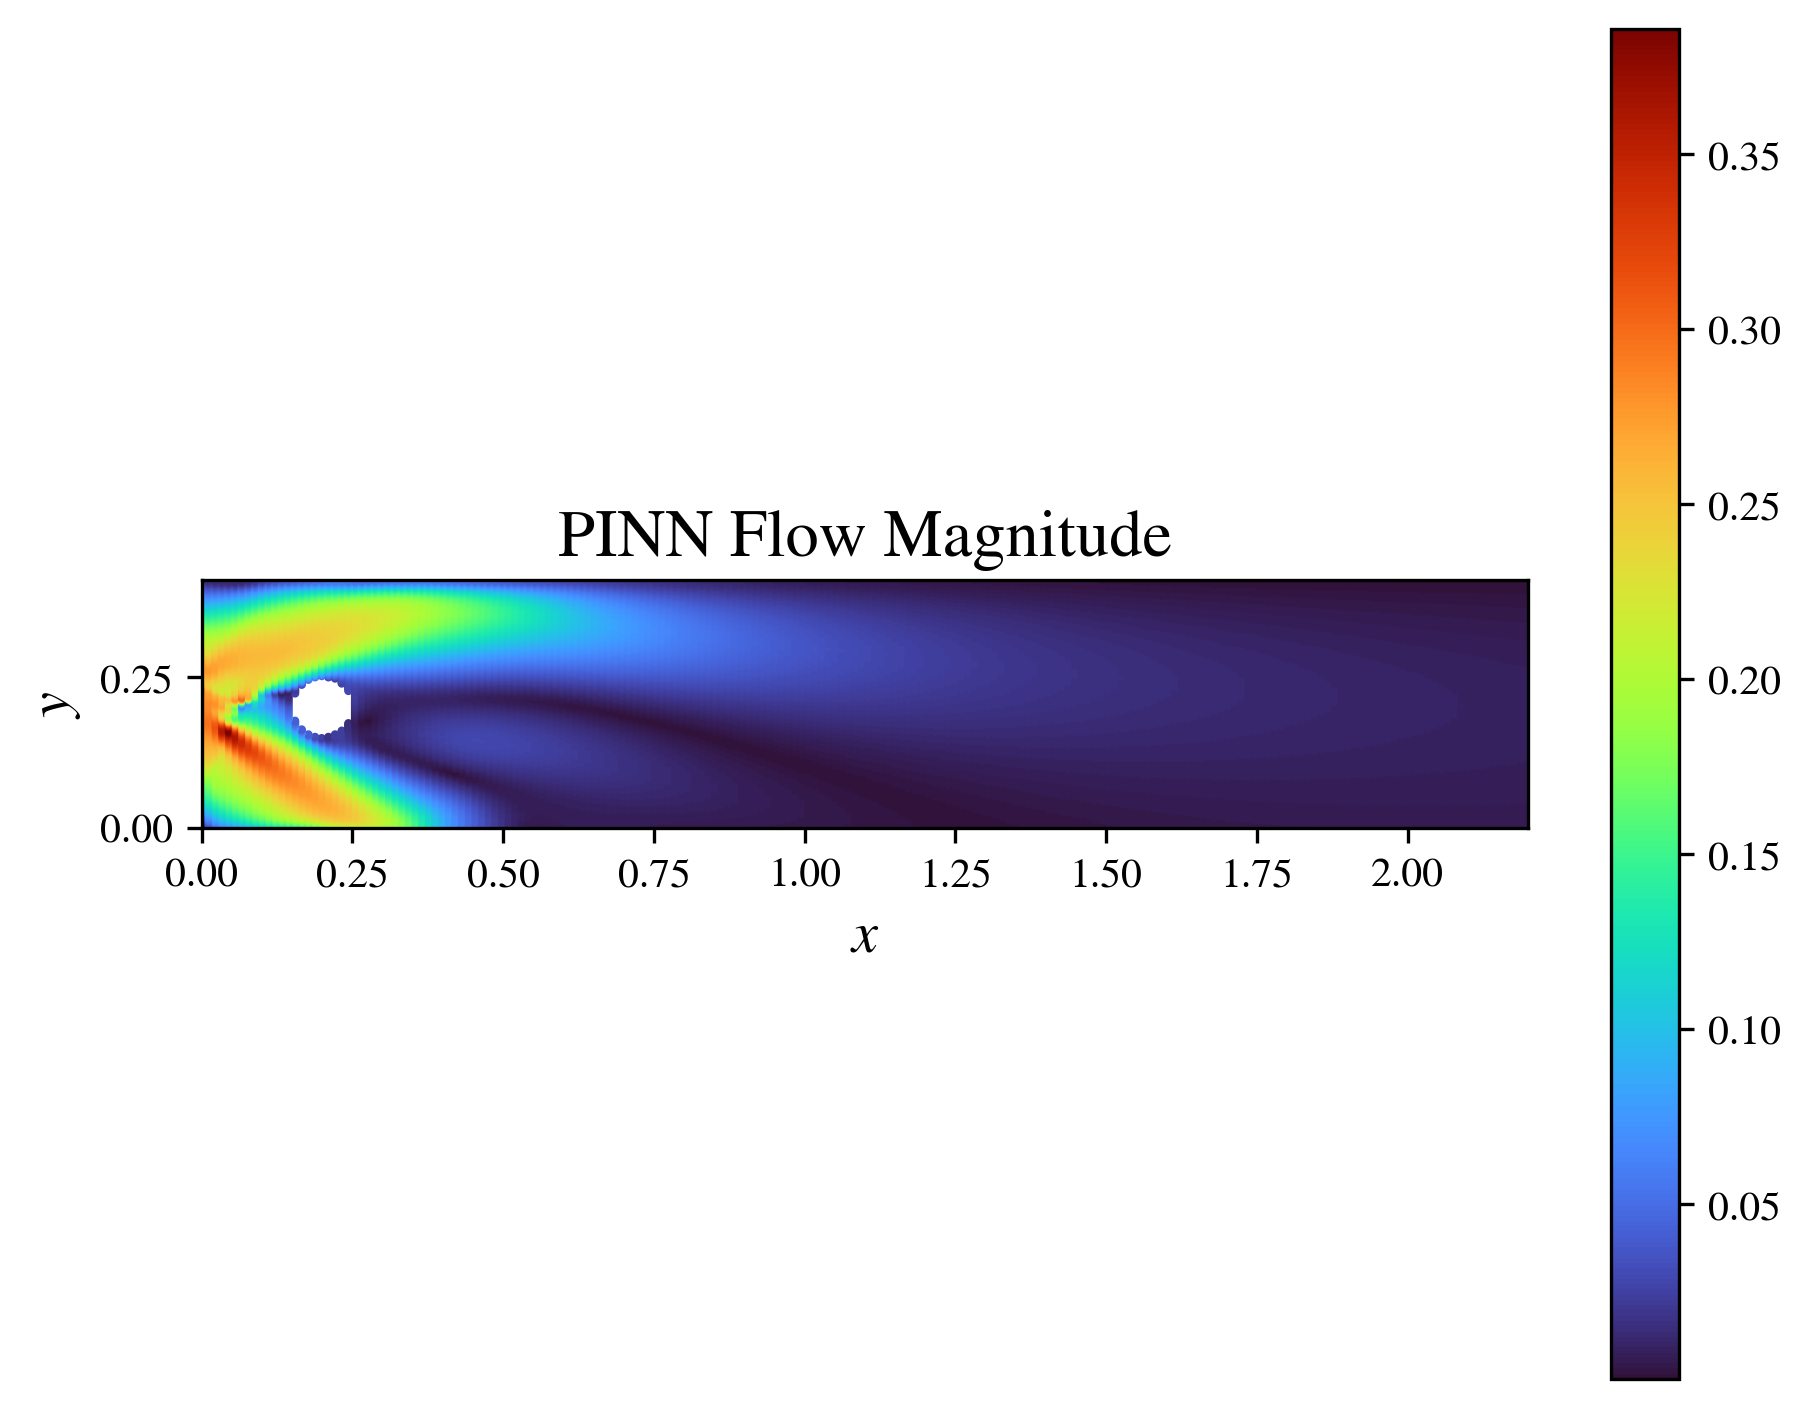

In [18]:
plotutils.plot_navier_stokes(np.concatenate(points), np.concatenate(flow_magitude), "PINN Flow Magnitude", No_decomp_solution_save_path, "flow_magnitude_no_decomp")

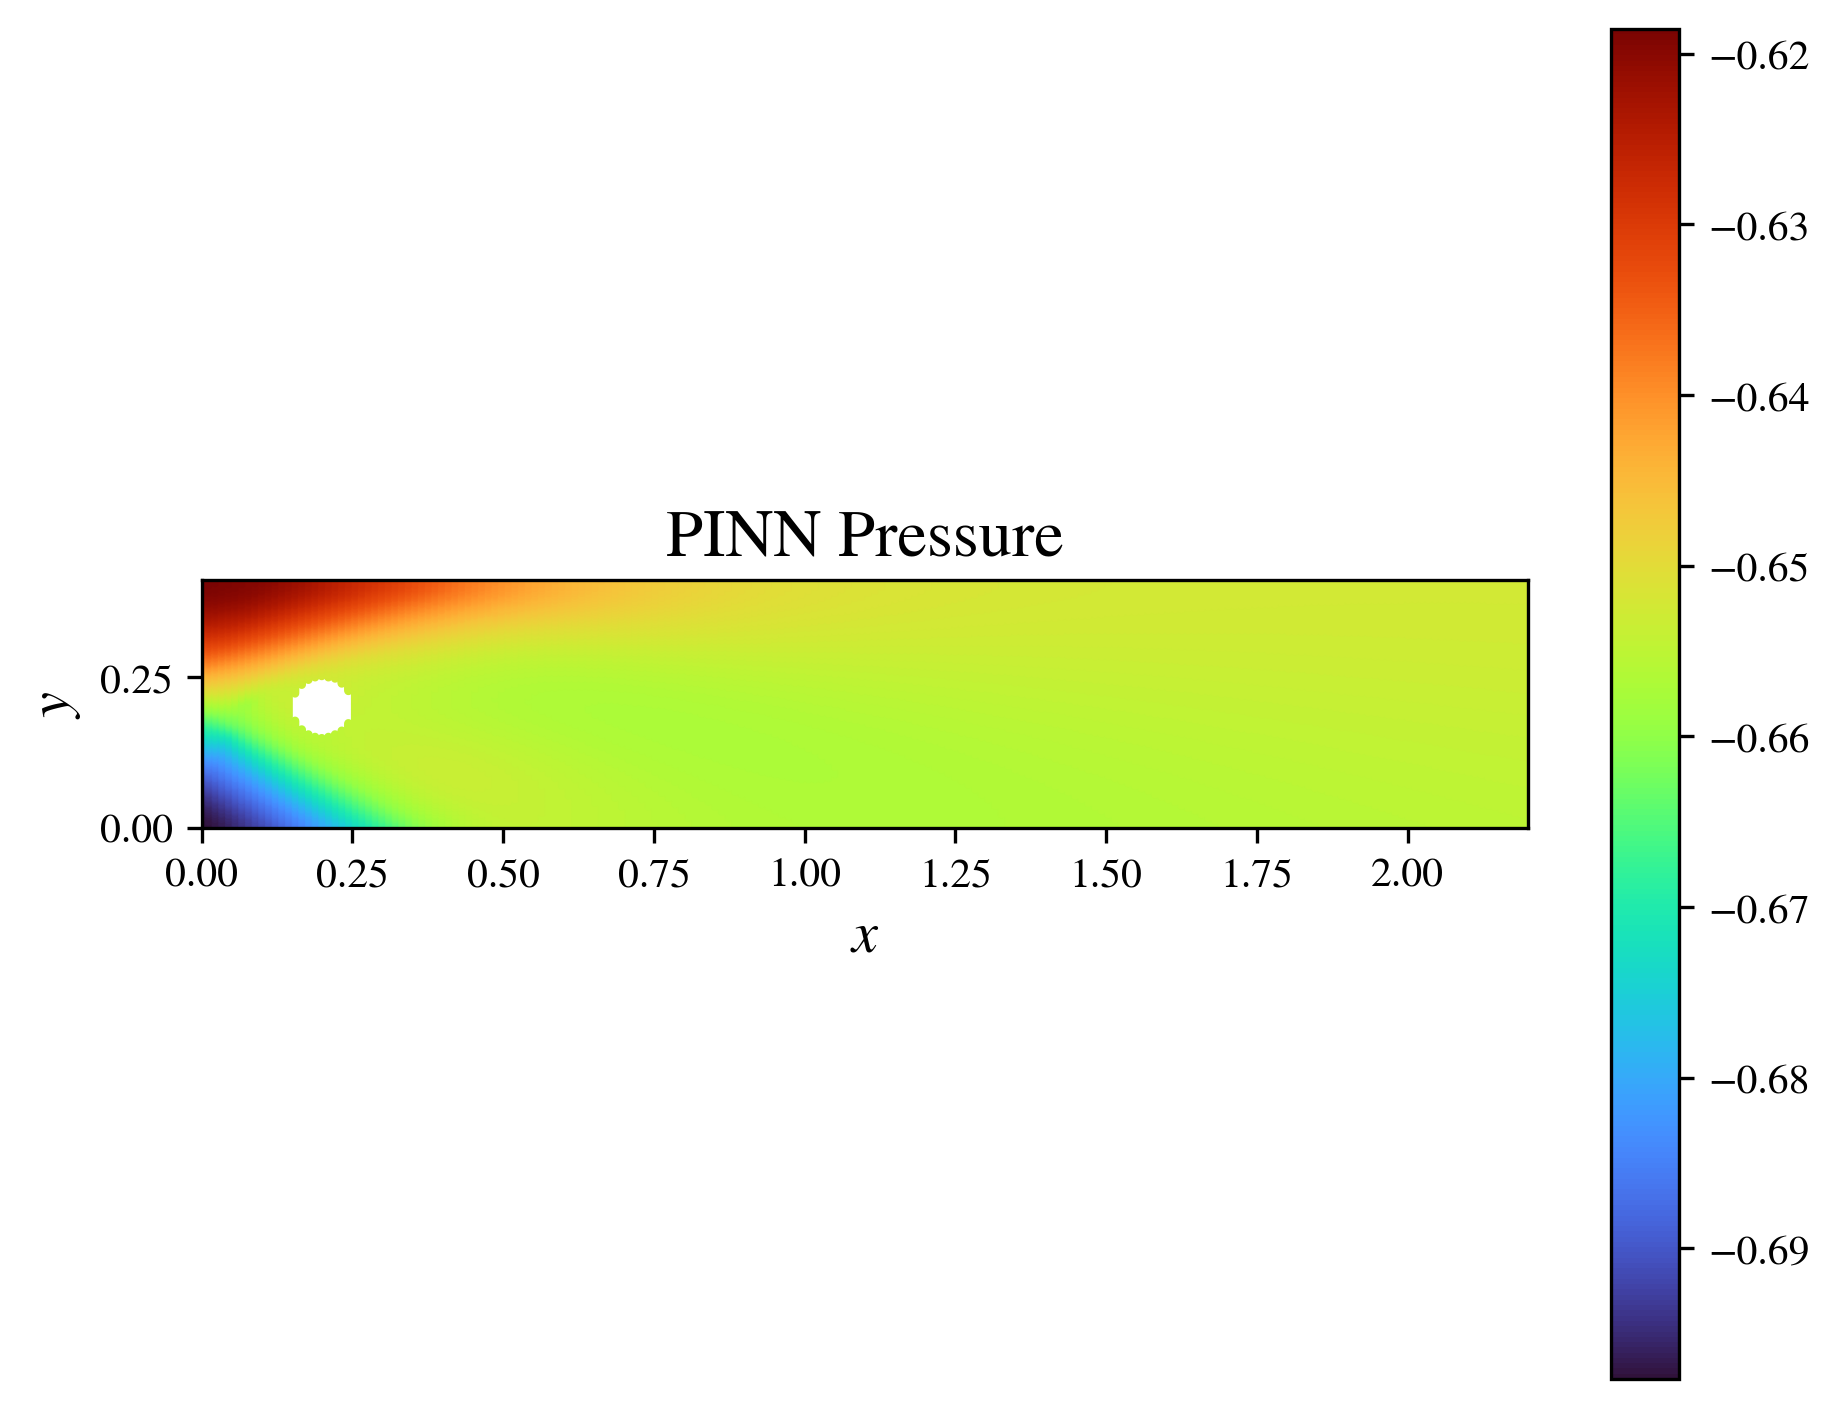

In [19]:
plotutils.plot_navier_stokes(np.concatenate(points), np.concatenate(pressure), "PINN Pressure", No_decomp_solution_save_path, "pressure_no_decomp")

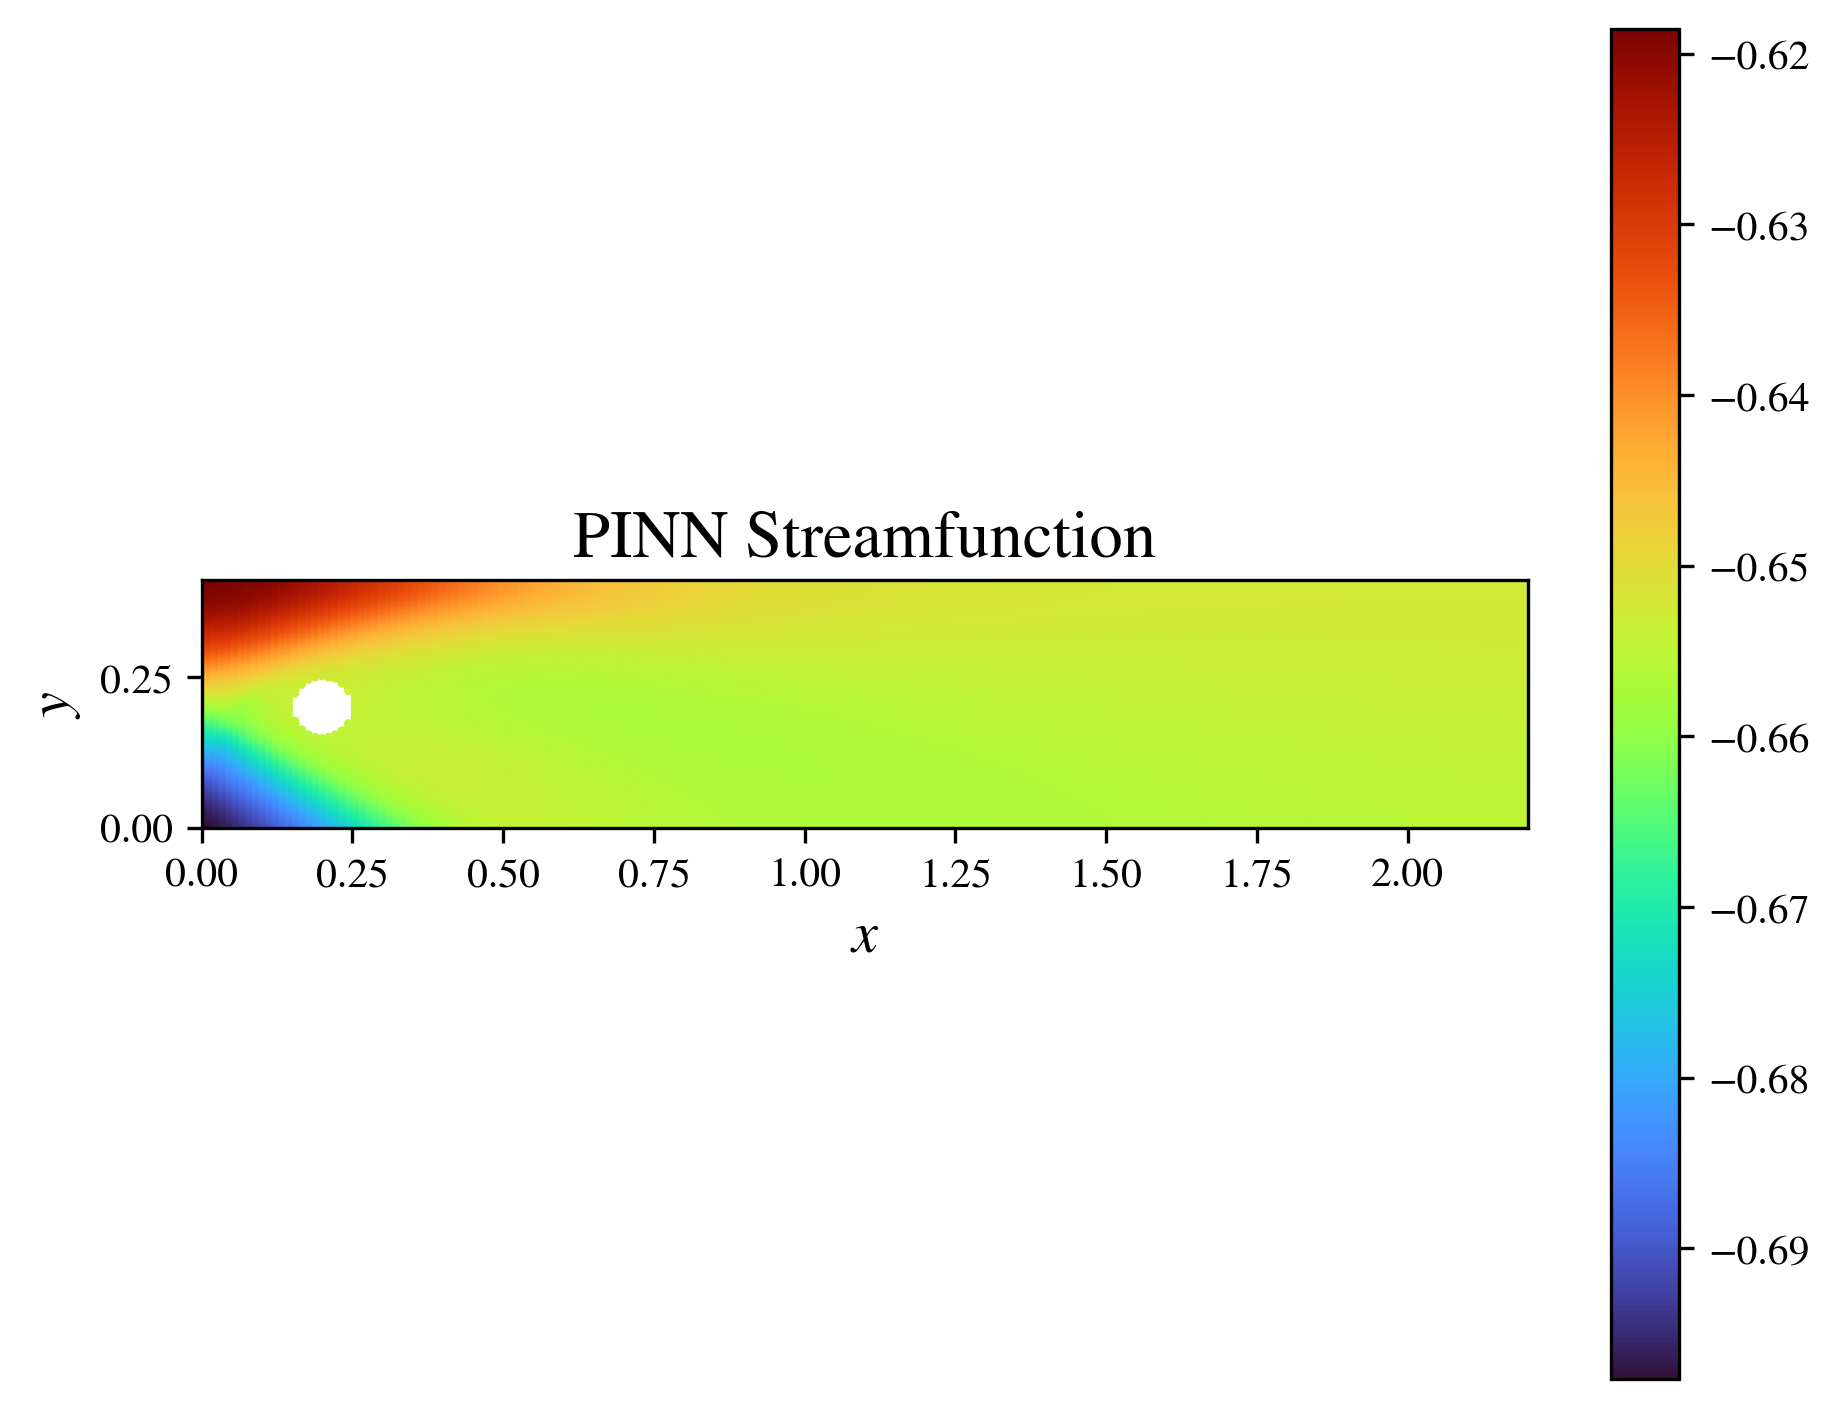

In [20]:
plotutils.plot_navier_stokes(np.concatenate(points), np.concatenate(streamfunction), "PINN Streamfunction", No_decomp_solution_save_path, "streamfunc_no_decomp")

In [21]:
#points, flow, flow_magitude, pressure, streamfunction = NSpredict(xpinnInnerBox, InnerBoxDecomp_file_test)

In [22]:
points, flow, flow_magitude, pressure, streamfunction = NSpredict(xpinnTwoBox, TwoBoxDecomp_file_test)

Two box decomp save paths

In [23]:
two_box_solution_save_path = fig_path / "NavierStokes" / "TwoBoxDecomp" / f"{TwoBox_model_str}" / "solution"


#make paths
two_box_solution_save_path.mkdir(parents=True, exist_ok=True)

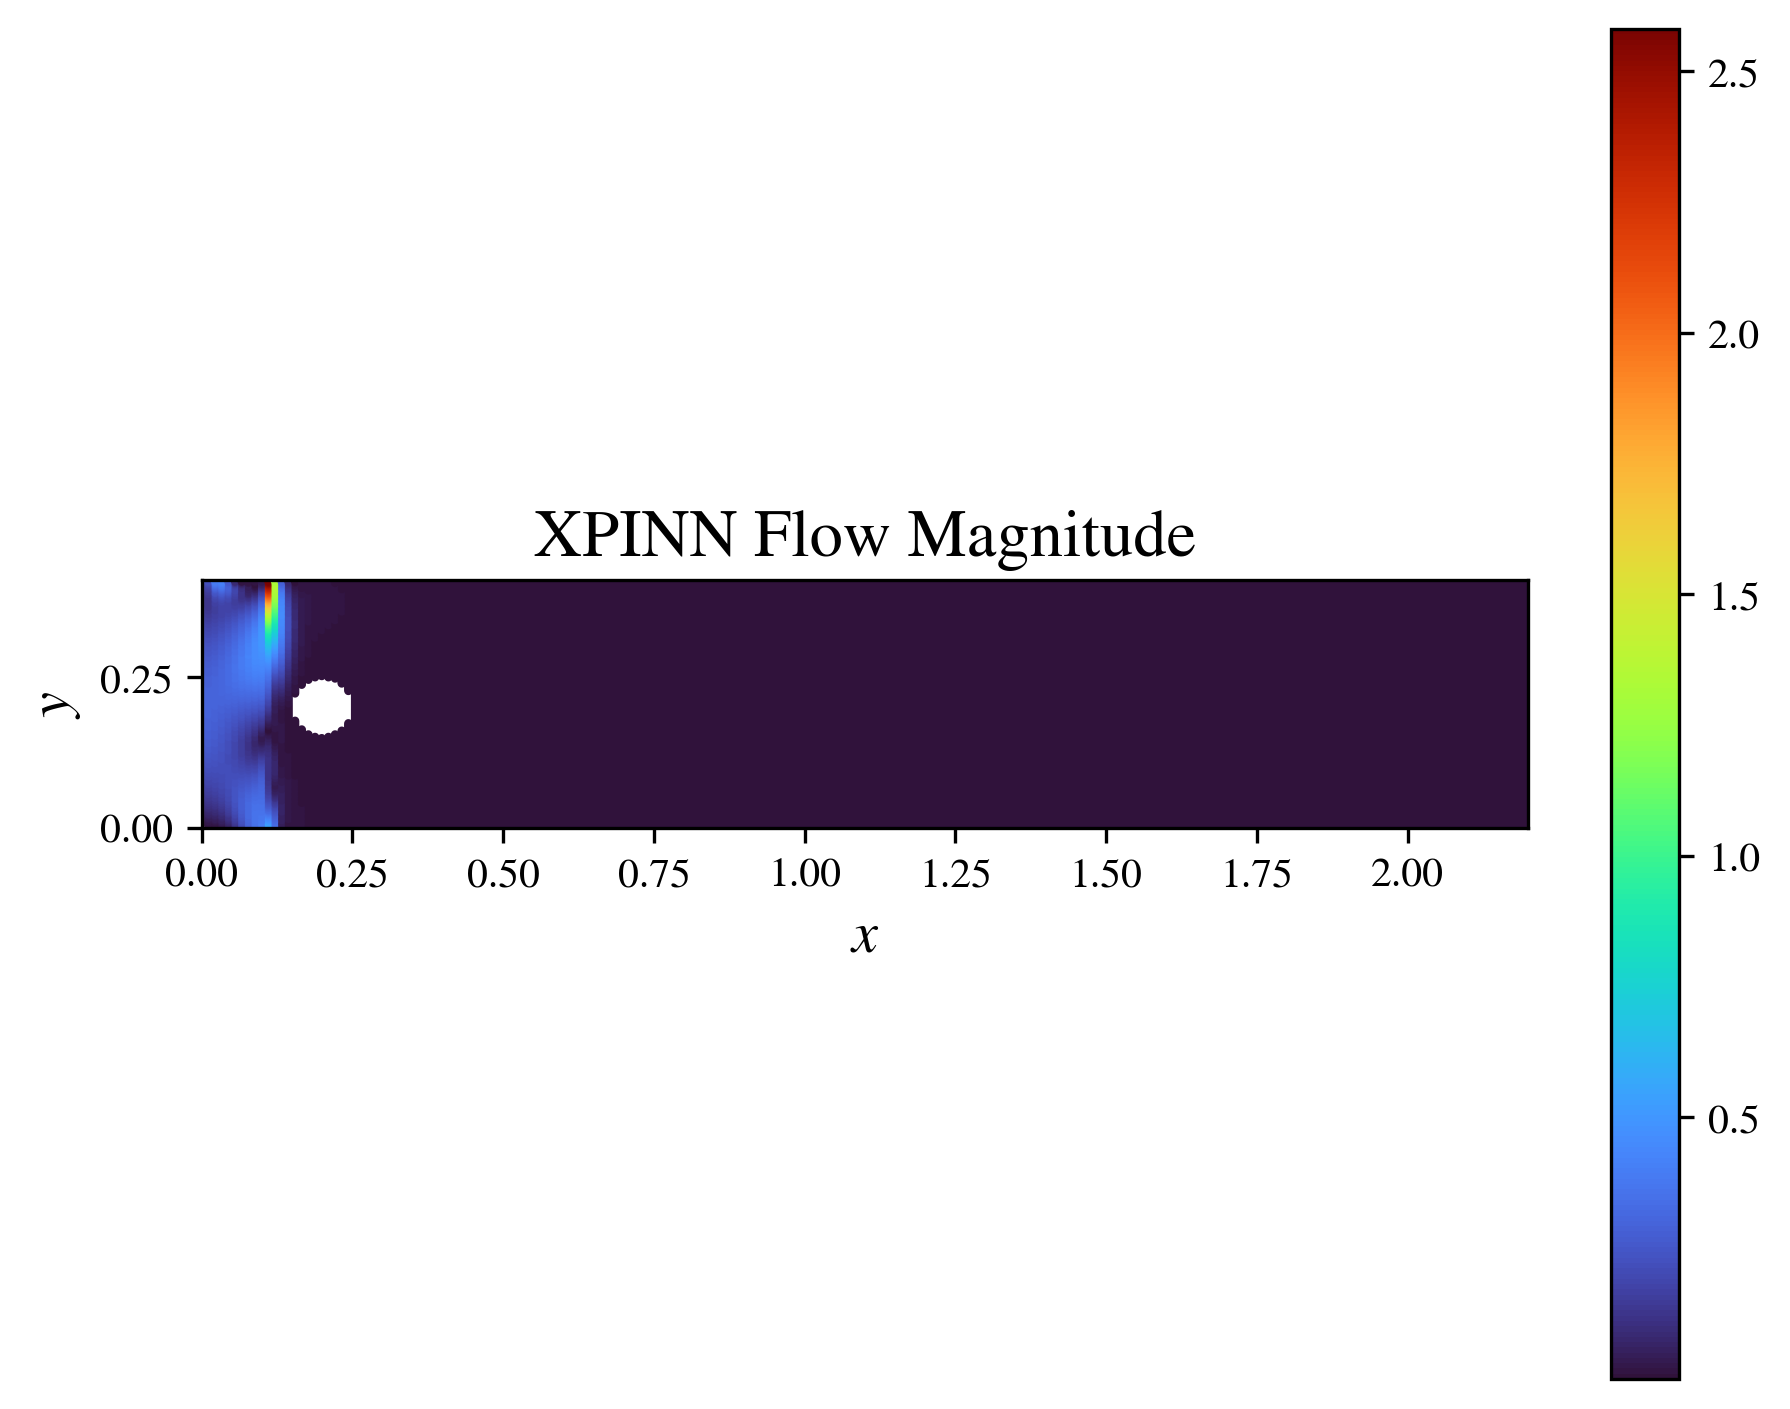

In [24]:
plotutils.plot_navier_stokes(np.concatenate(points), np.concatenate(flow_magitude), "XPINN Flow Magnitude", two_box_solution_save_path, "flow_magnitude_two_box")

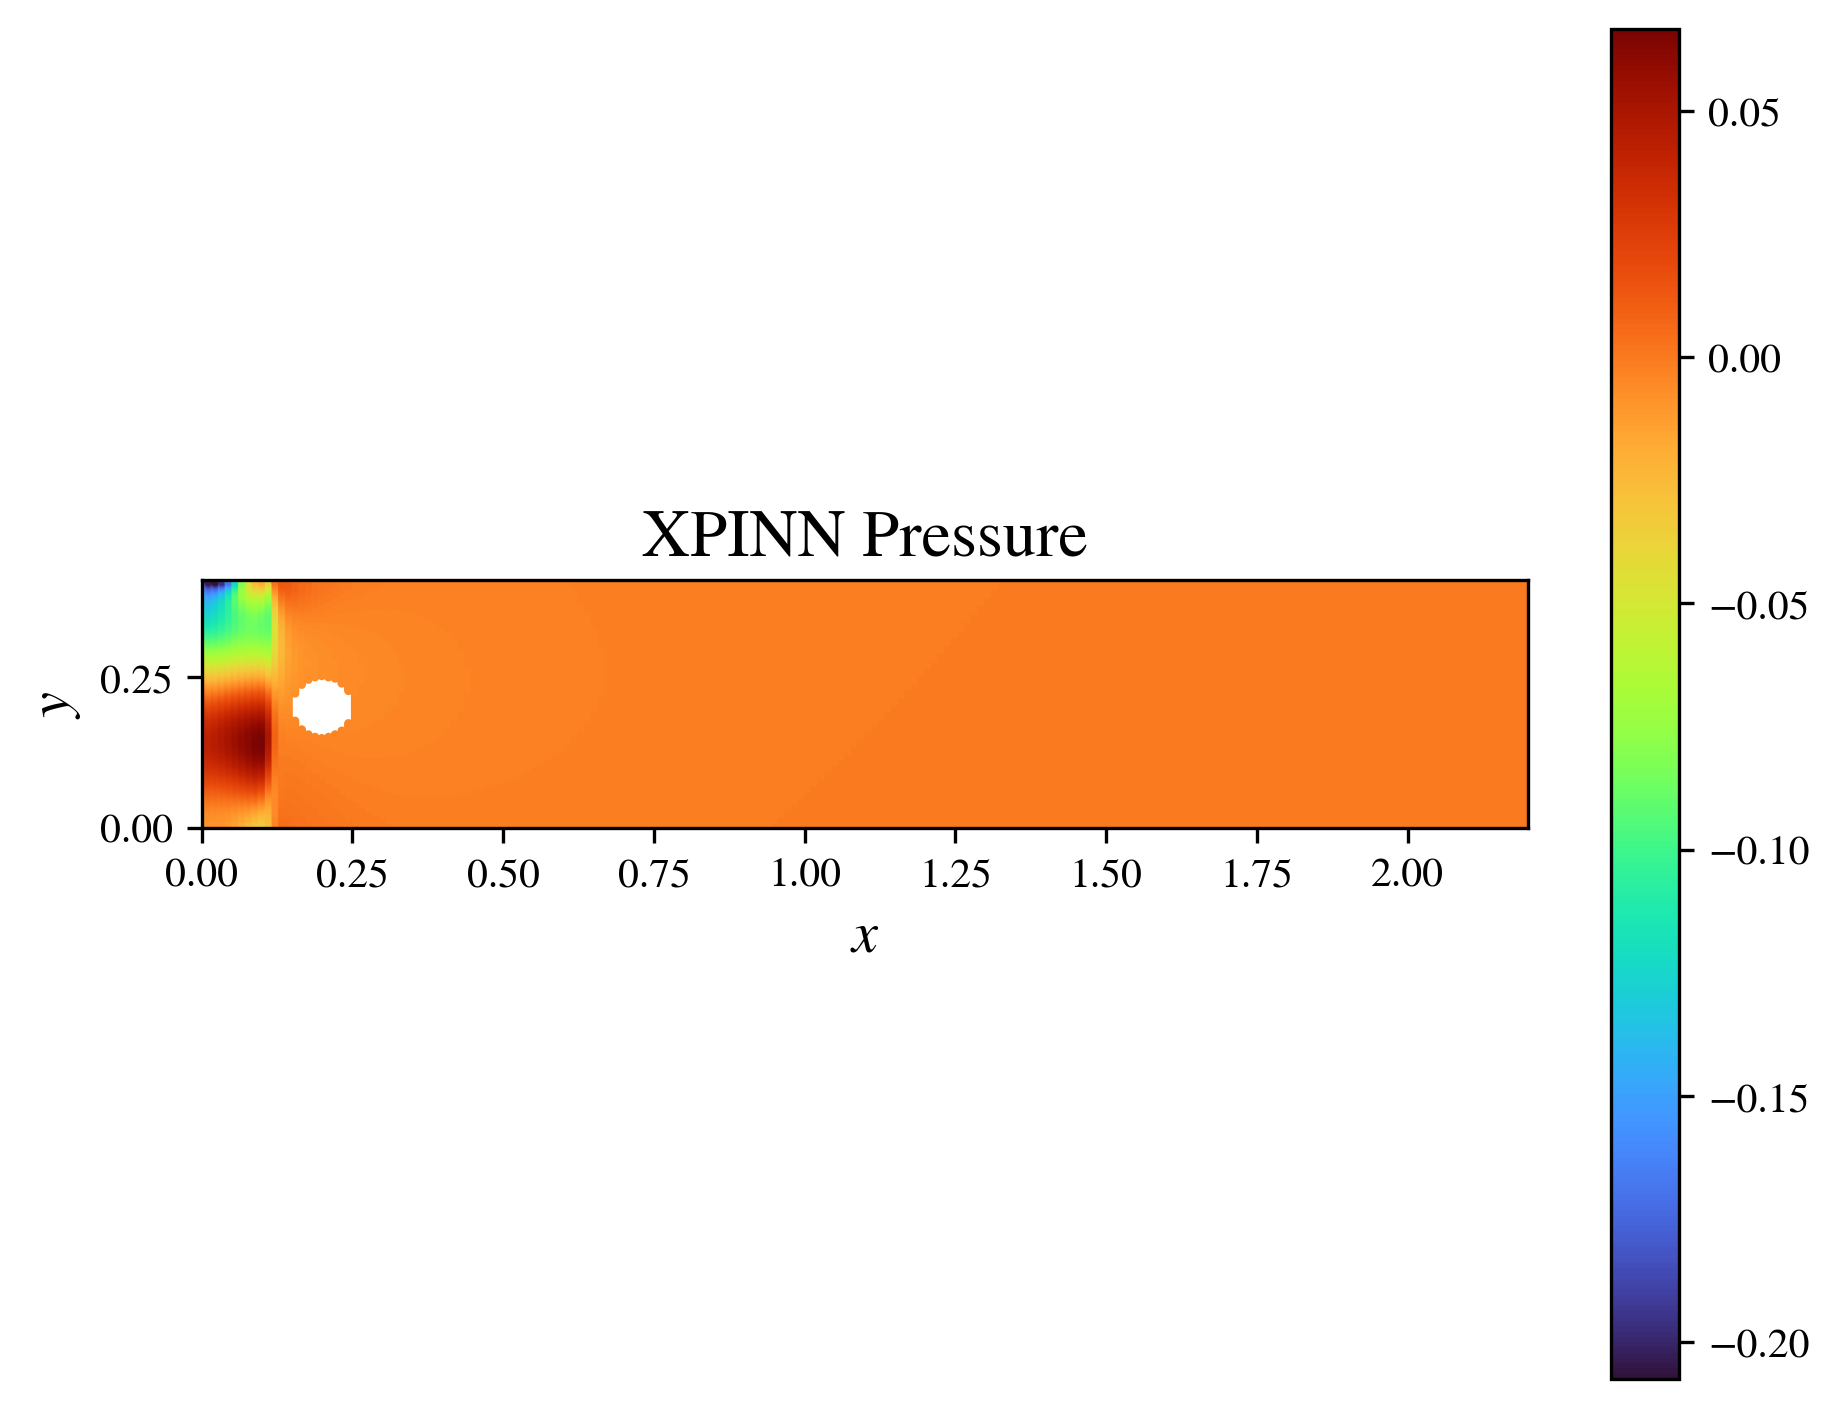

In [25]:
plotutils.plot_navier_stokes(np.concatenate(points), np.concatenate(pressure), "XPINN Pressure", two_box_solution_save_path, "pressure_two_box")

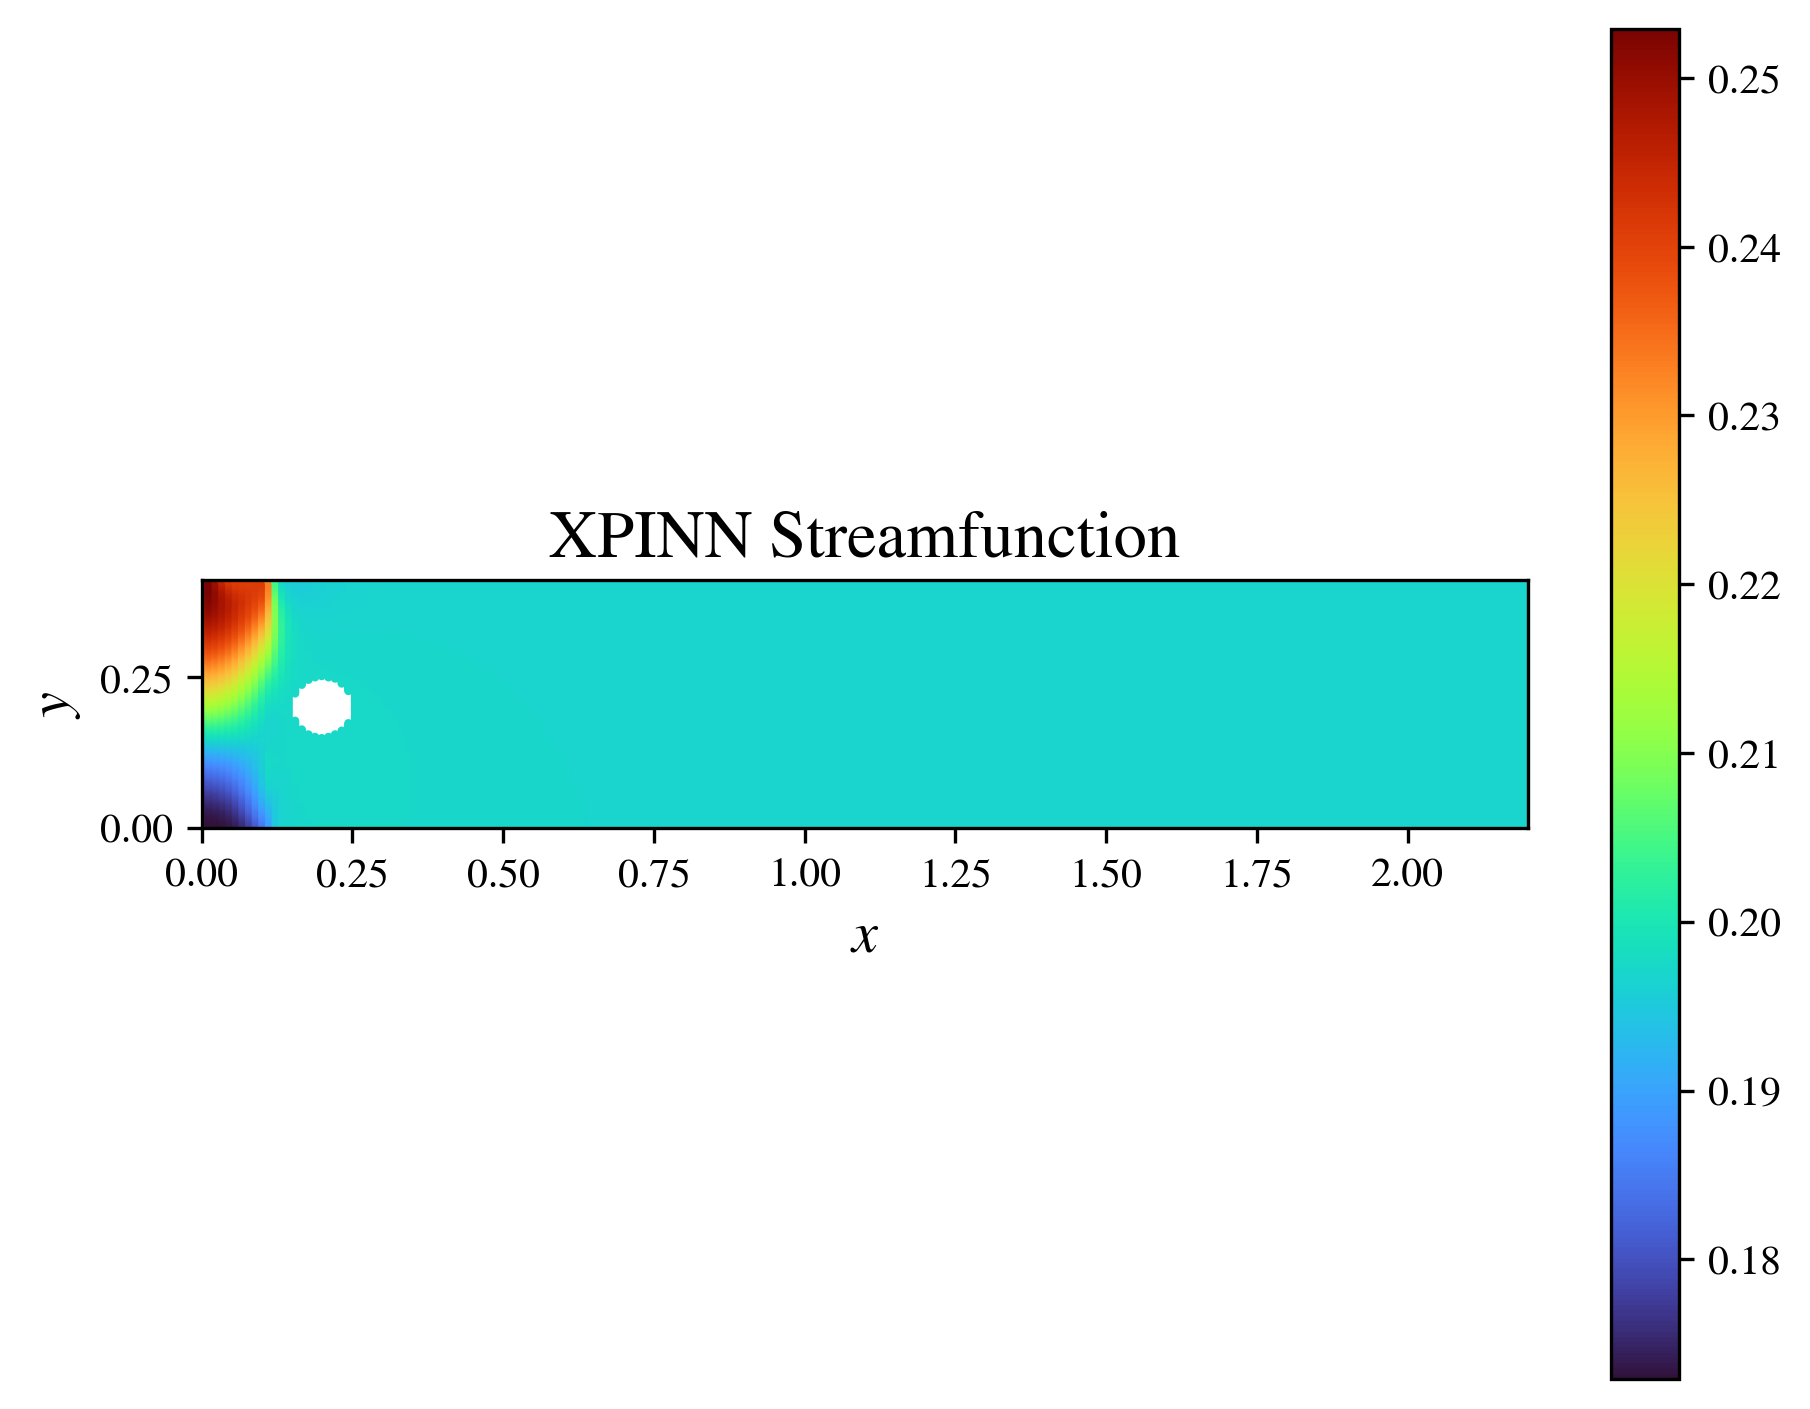

In [26]:
plotutils.plot_navier_stokes(np.concatenate(points), np.concatenate(streamfunction), "XPINN Streamfunction", two_box_solution_save_path, "streamfunc_two_box")